Dataset Overview:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  


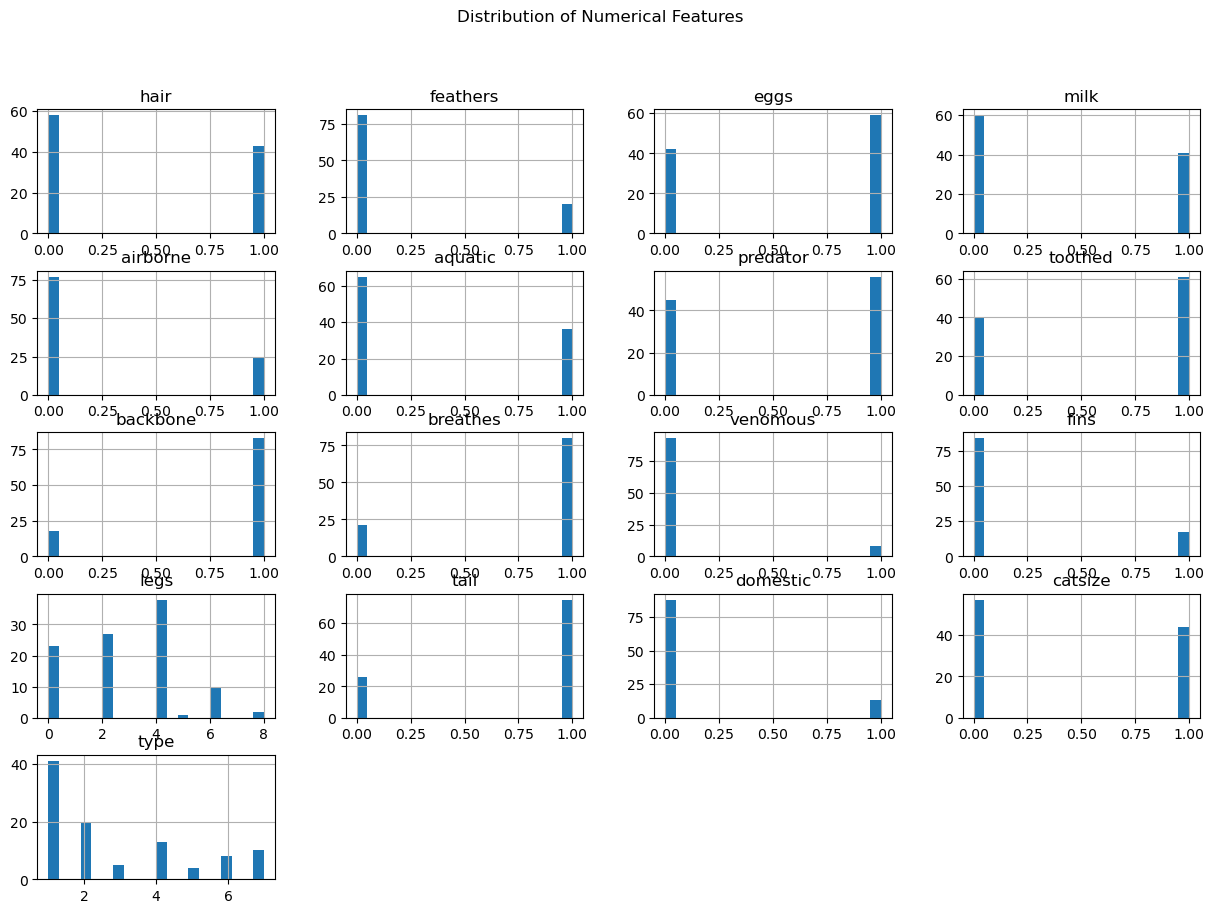

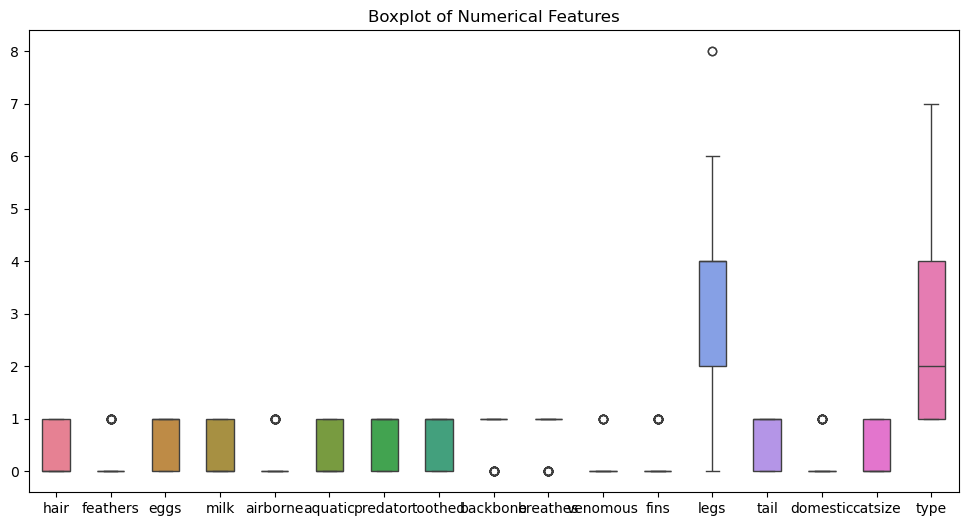

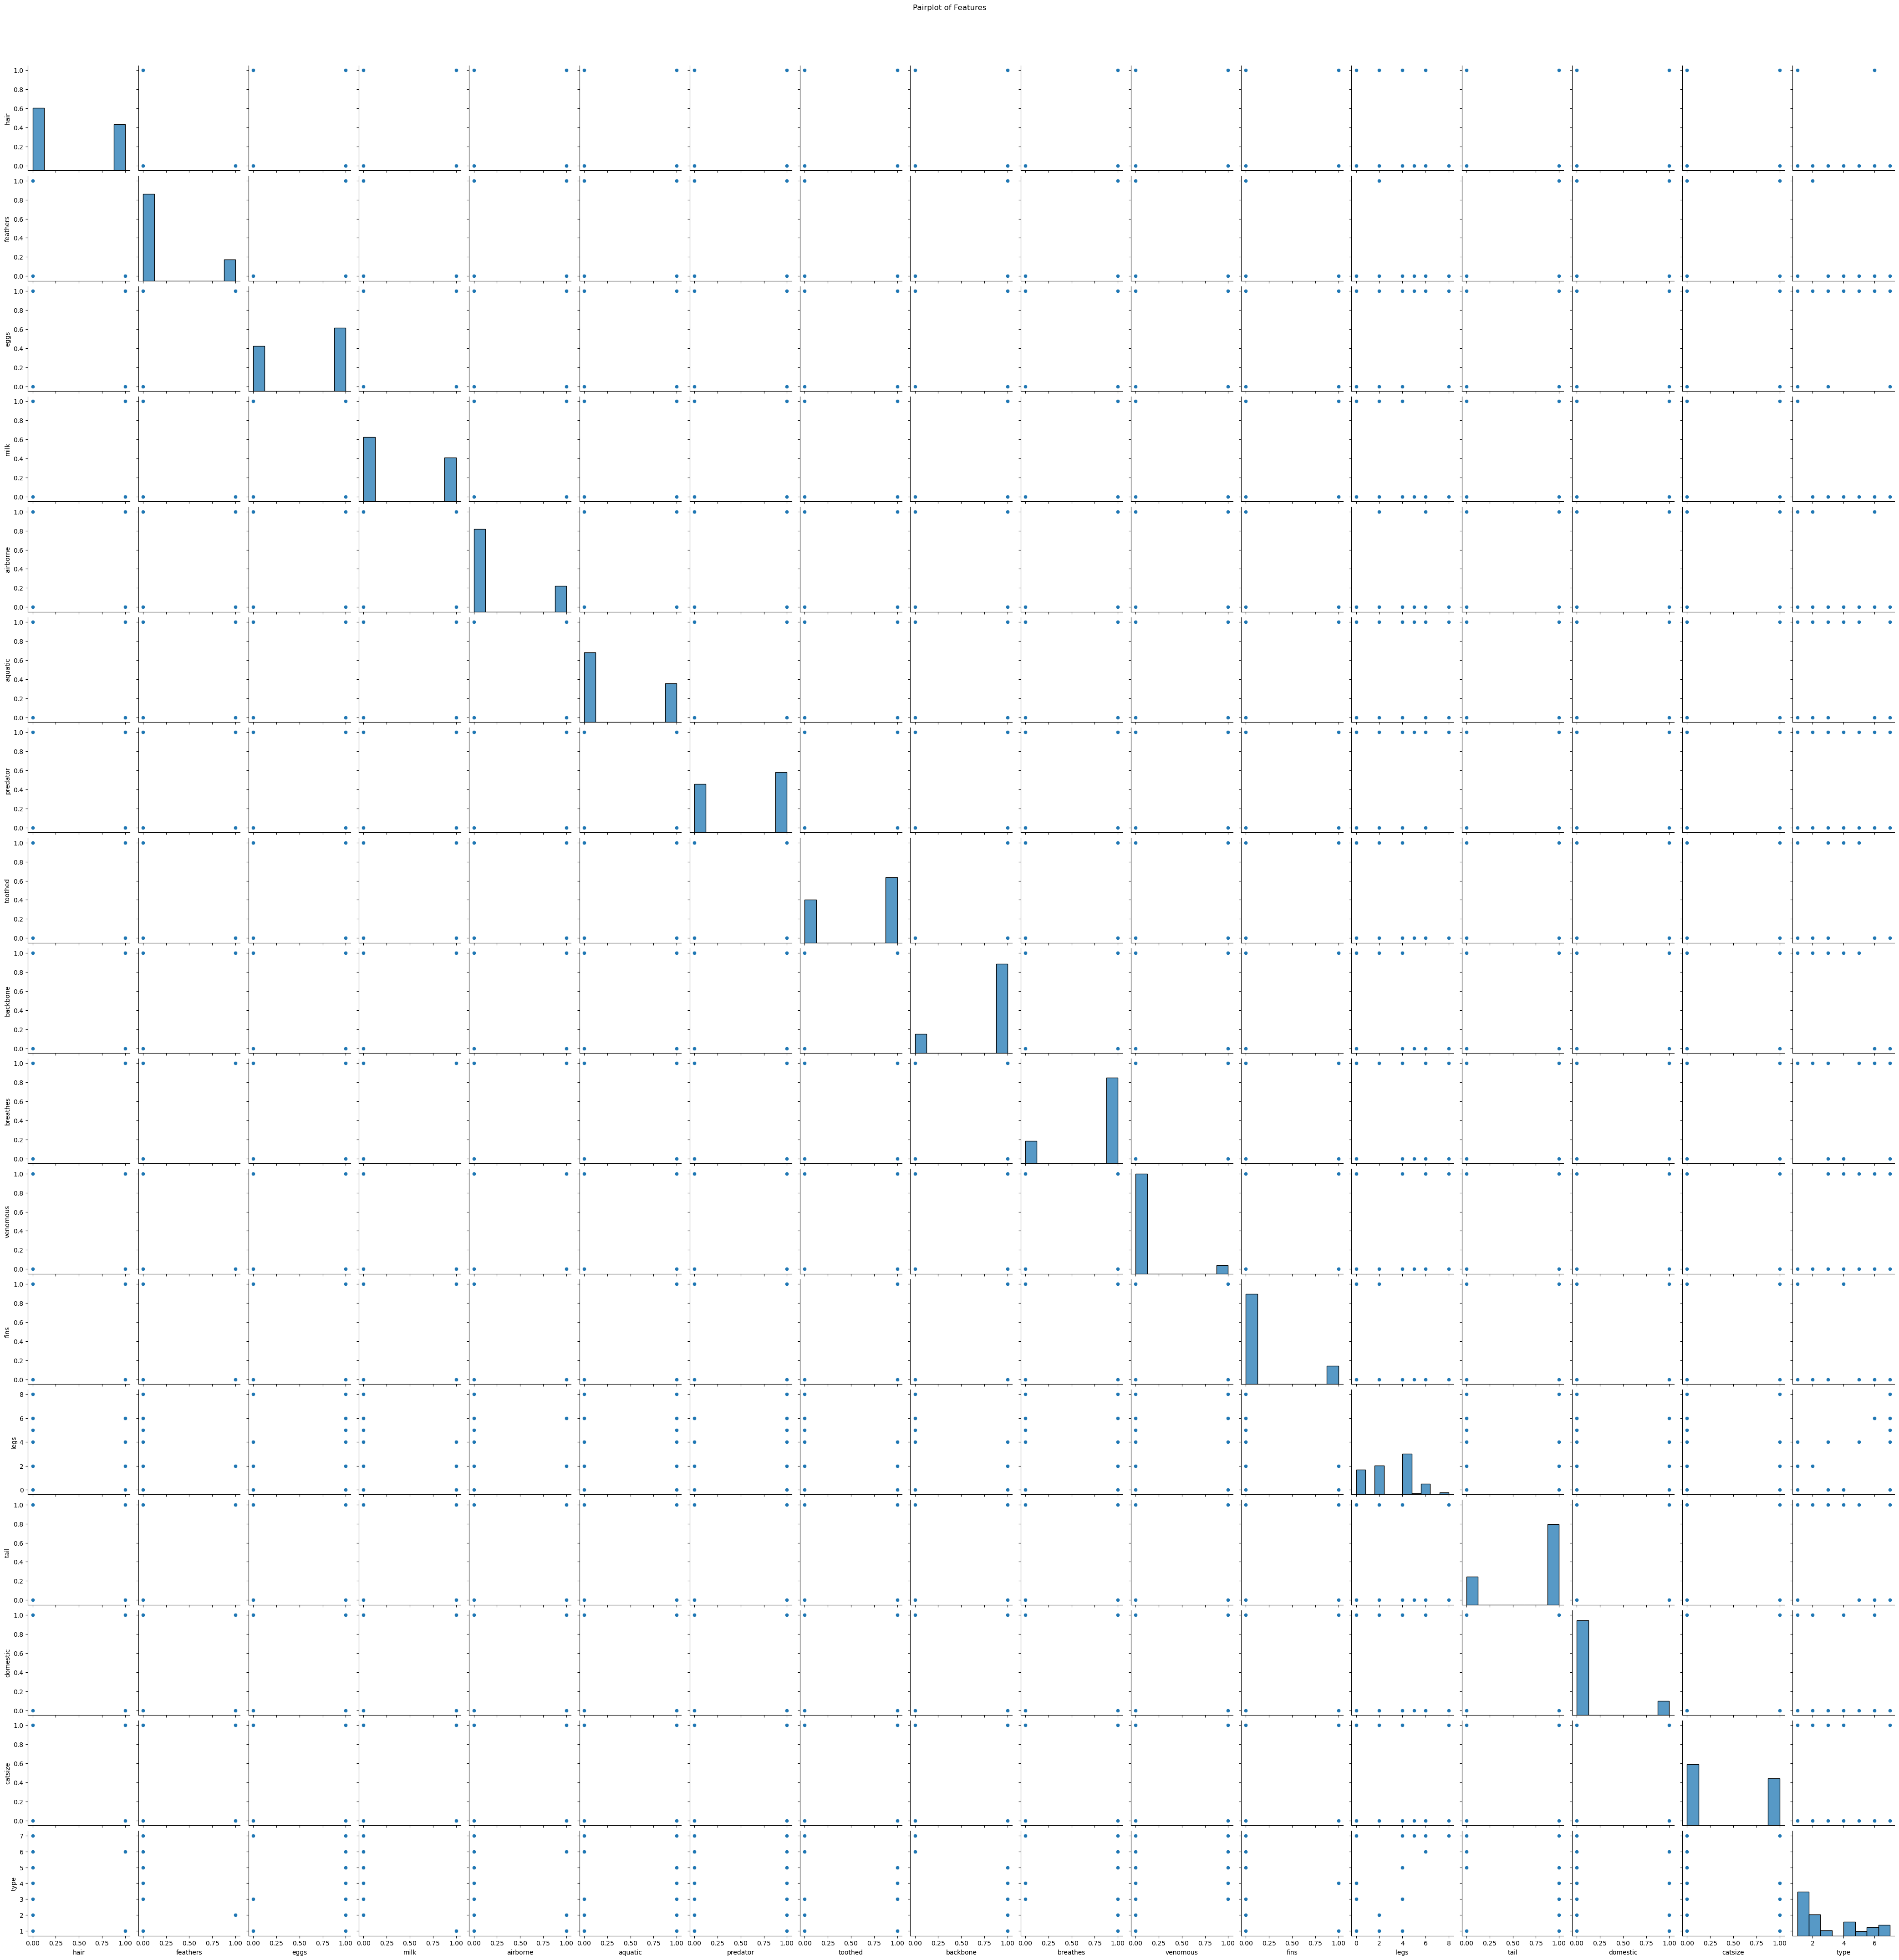

KeyError: "None of [Index(['actual_column_name'], dtype='object')] are in the [columns]"

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\KNN\KNN\Zoo.csv")
print("Dataset Overview:")
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Visualizing the distribution of numerical features using histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), width=0.5)
plt.title('Boxplot of Numerical Features')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Step 3: Data Preprocessing

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df.columns
df_imputed['actual_column_name'] = imputer.fit_transform(df[['actual_column_name']])

# Handle categorical missing values (if any)
imputer_cat = SimpleImputer(strategy='most_frequent')
df_imputed['categorical_column'] = imputer_cat.fit_transform(df[['categorical_column']])

# Encode categorical variables using One-Hot Encoding
df_imputed = pd.get_dummies(df_imputed, drop_first=True)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X = df_imputed.drop(columns=['Target'])
y = df_imputed['Target']

X_scaled = scaler.fit_transform(X)

# Step 4: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Implement the K-Nearest Neighbours algorithm
# Finding the optimal K using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Optimal K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal K value: {best_k}")

# Build the KNN model with the optimal K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Step 6: Evaluate the classifier's performance on the testing set
y_pred = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy, precision, recall, and F1-score
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Step 7: Visualize the decision boundaries of the classifier

plt.figure(figsize=(8, 6))

# Plot decision boundary for the first two features
X_train_2d = X_train[:, :2] 

# Train the model on 2D data
knn.fit(X_train_2d, y_train)

# Create a mesh grid for plotting the decision boundary
h = .02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot training points
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train, palette='Set1', edgecolor='black')
plt.title(f"Decision Boundary of KNN with K={best_k}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [3]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\KNN\KNN\Zoo.csv")
print("Dataset Overview:")
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Visualizing the distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), width=0.5)
plt.title('Boxplot of Numerical Features')
plt.show()

# Step 3: Data Preprocessing
# Handle missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Handle categorical missing values (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Encode categorical variables if they exist
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Ensure the target variable is correctly labeled
target_column = 'type'  # Change if necessary
if target_column in df.columns:
    y = df[target_column]
    X = df.drop(columns=[target_column])
else:
    raise ValueError("Target column not found in dataset")

# Encode target variable if it's categorical
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Implement K-Nearest Neighbours algorithm
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Optimal K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal K value: {best_k}")

# Train KNN with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Step 6: Evaluate classifier
y_pred = knn.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Step 7: Visualizing decision boundary using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1', edgecolor='black')
plt.title(f"Decision Boundary of KNN with K={best_k} using PCA")
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()
